**Проект 2. Разведывательный анализ данных**   
выполнил: Закиров Наиль (DST-53)  
2021-04-07

In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

from itertools import combinations
from scipy.stats import ttest_ind

In [191]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок



In [192]:
students = pd.read_csv('stud_math.csv')

In [193]:
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [194]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [195]:
# удалим столбец 'studytime, granular'
students = students.drop('studytime, granular', 1)

In [196]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [197]:
students.isna().any()

school        False
sex           False
age           False
address        True
famsize        True
Pstatus        True
Medu           True
Fedu           True
Mjob           True
Fjob           True
reason         True
guardian       True
traveltime     True
studytime      True
failures       True
schoolsup      True
famsup         True
paid           True
activities     True
nursery        True
higher         True
internet       True
romantic       True
famrel         True
freetime       True
goout          True
health         True
absences       True
score          True
dtype: bool

In [198]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


## Тепловая карта пропущенных значений

<AxesSubplot:>

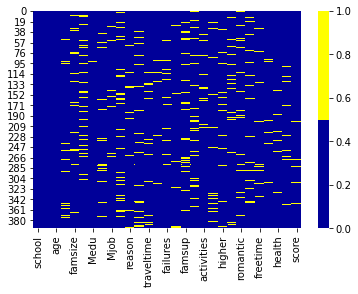

In [158]:
cols = students.columns 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(students[cols].isnull(), cmap=sns.color_palette(colours))

### Процентный список пропущенных данных

In [159]:
for col in students.columns:
    pct_missing = np.mean(students[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0%
sex - 0%
age - 0%
address - 4%
famsize - 7%
Pstatus - 11%
Medu - 1%
Fedu - 6%
Mjob - 5%
Fjob - 9%
reason - 4%
guardian - 8%
traveltime - 7%
studytime - 2%
failures - 6%
schoolsup - 2%
famsup - 10%
paid - 10%
activities - 4%
nursery - 4%
higher - 5%
internet - 9%
romantic - 8%
famrel - 7%
freetime - 3%
goout - 2%
health - 4%
absences - 3%
score - 2%


### Поиск отсутствующих значений в записях

<AxesSubplot:xlabel='index'>

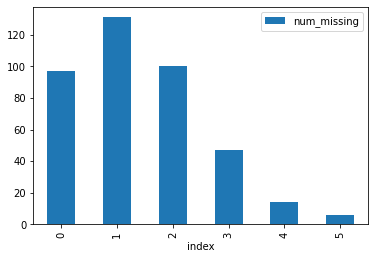

In [160]:
students_miss = pd.DataFrame()
for col in students.columns:
    missing = students[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        #print('created missing indicator for: {}'.format(col))
        students_miss['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in students_miss.columns if 'ismissing' in col]
students_miss['num_missing'] = students_miss[ismissing_cols].sum(axis=1)

students_miss['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [161]:
students_miss.num_missing.value_counts()


1    131
2    100
0     97
3     47
4     14
5      6
Name: num_missing, dtype: int64

In [162]:
numeric_cols = students.select_dtypes(include=[np.number]).columns.values
numeric_cols

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'score'],
      dtype=object)

In [163]:
non_numeric_cols = students.select_dtypes(exclude=[np.number]).columns.values
non_numeric_cols

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

**Опишем функции для обрабокти пропущенных значений и выбросов.**

In [164]:
def null_numeric_processing(df, col, drop=False, value=''):
    if drop:
        df.dropna(subset=[col], inplace=True)
    else:
        if value == '':
            missing = df[col].isnull()
            num_missing = np.sum(missing)

            if num_missing > 0:
                #print('imputing missing values for: {}'.format(col))
                #df['{}_ismissing'.format(col)] = missing
                med = df[col].median()
                df[col] = df[col].fillna(med)
                return med
        else:
            df[col] = df[col].fillna(value)

In [165]:
def null_non_numeric_processing(df, col, drop=False, value=''):
    if drop:
        df.dropna(subset=[col], inplace=True)
    else:
        if value == '':
            missing = df[col].isnull()
            num_missing = np.sum(missing)

            if num_missing > 0:  # only do the imputation for the columns that have missing values.
                top = df[col].describe()['top'] # impute with the most frequent value.
                df[col] = df[col].fillna(top)
                return top
        else:
            df[col] = df[col].fillna(value)

In [166]:
def outliers_processing(df, col, min_value='', max_value='', value='', drop=False):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    if min_value != '':
        lower_limit = min_value
    if max_value != '':
        upper_limit = max_value
    outliers_count = df[col][(df[col] < lower_limit) | (df[col] > upper_limit)].count()
    if value != '':
        df[col] = df[col].apply(lambda x: value if x >
                                upper_limit or x < lower_limit else x)
    if drop:
        df.drop(df[(df[col] < lower_limit) | (df[col] > upper_limit)].index, inplace=True)
    return outliers_count

In [167]:
def to_binary(df, col, value1, value0):
    df[col] = df[col].apply(lambda x: 1 if x == value1 else x)
    df[col] = df[col].apply(lambda x: 0 if x == value0 else x)

## school

In [168]:
students.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

In [169]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду GP - 1 и MS - 0:
to_binary(students, 'school', 'GP', 'MS')
students.school.value_counts(dropna=False)

1    349
0     46
Name: school, dtype: int64

## sex


In [170]:
students.sex.value_counts(dropna=False)

F    208
M    187
Name: sex, dtype: int64

In [171]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду M - 1 и F - 0:
to_binary(students, 'sex', 'M', 'F')
students.sex.value_counts(dropna=False)

0    208
1    187
Name: sex, dtype: int64

### age


Столбец числовой и без пропусков. Посмотрим на его распределение.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

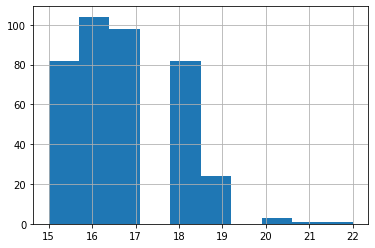

In [172]:
students.age.hist()
students.age.describe()

Как видно, у этого признака распределение без аномалий, выбросов нет.

## address

In [173]:
students.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

Удалим записи с пустыми значениями


In [174]:
null_non_numeric_processing(students, 'address', drop=True)

In [175]:
students.address.value_counts(dropna=False)

U    295
R     83
Name: address, dtype: int64

In [176]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду U - 1 и R - 0:
to_binary(students, 'address', 'U', 'R')
students.address.value_counts(dropna=False)

1    295
0     83
Name: address, dtype: int64

## famsize

In [177]:
students.famsize.value_counts(dropna=False)

GT3    251
LE3    101
NaN     26
Name: famsize, dtype: int64

Удалим записи с пустыми значениями

In [178]:
null_non_numeric_processing(students, 'famsize', drop=True)

In [179]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду GT3 - 1 и LE3 - 0:
to_binary(students, 'famsize', 'GT3', 'LE3')
students.famsize.value_counts(dropna=False)

1    251
0    101
Name: famsize, dtype: int64

## Pstatus


In [180]:
students.Pstatus.value_counts(dropna=False)

T      281
NaN     40
A       31
Name: Pstatus, dtype: int64

In [181]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'Pstatus', drop=True)
students.Pstatus.value_counts(dropna=False)

T    281
A     31
Name: Pstatus, dtype: int64

In [182]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду T - 1 и A - 0:
to_binary(students, 'Pstatus', 'T', 'A')
students.Pstatus.value_counts(dropna=False)

1    281
0     31
Name: Pstatus, dtype: int64

## Medu

count    312.000000
mean       2.772436
std        1.103696
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

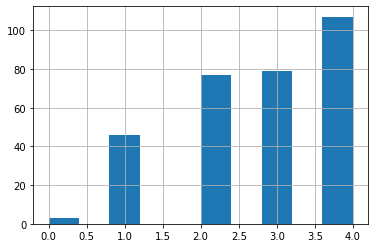

In [183]:
#Столбец числовой, посмотрим на его распределение
students.Medu.hist()
students.Medu.describe()

In [184]:
students.Medu.value_counts(dropna=False)

4.0    107
3.0     79
2.0     77
1.0     46
0.0      3
Name: Medu, dtype: int64

Выбросов не наблюдаем.

In [185]:
# Заменим пустые значения на медиану
null_numeric_processing(students, 'Medu')

In [186]:
students.Medu.value_counts(dropna=False)

4.0    107
3.0     79
2.0     77
1.0     46
0.0      3
Name: Medu, dtype: int64

count    312.000000
mean       2.772436
std        1.103696
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

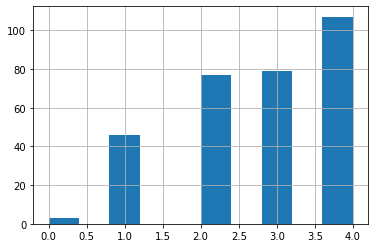

In [187]:
students.Medu.hist()
students.Medu.describe()

## Fedu

In [188]:
students.Fedu.value_counts(dropna=False)

2.0    86
3.0    76
4.0    72
1.0    57
NaN    20
0.0     1
Name: Fedu, dtype: int64

В выборке присутствует выброс, который является скорее всего ошибкой ввода. 

In [40]:
# Заменим все пустые значения на медиану.
null_numeric_processing(students, 'Fedu')

3.0

In [41]:
# Удалим выброс
outliers_processing(students, 'Fedu', min_value=0, max_value=4, drop=True)

0

3.0    96
2.0    86
4.0    72
1.0    57
0.0     1
Name: Fedu, dtype: int64

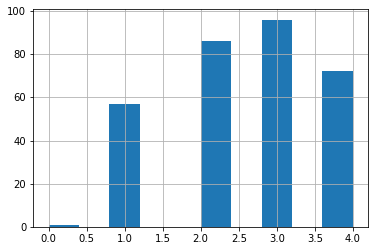

In [42]:
students.Fedu.hist()
students.Fedu.value_counts()

## Mjob

In [43]:
students.Mjob.value_counts(dropna=False)

other       108
services     77
teacher      44
at_home      44
health       26
NaN          13
Name: Mjob, dtype: int64

In [44]:
#Заменим пропуски на наиболее распространенное значение:
null_non_numeric_processing(students, 'Mjob')
students.Mjob.value_counts(dropna=False)

other       121
services     77
teacher      44
at_home      44
health       26
Name: Mjob, dtype: int64

## Fjob

In [45]:
students.Fjob.value_counts(dropna=False)

other       144
services     84
NaN          33
teacher      25
health       14
at_home      12
Name: Fjob, dtype: int64

In [46]:
#Заменим пропуски на наиболее распространенное значение:
null_non_numeric_processing(students, 'Fjob')
students.Fjob.value_counts(dropna=False)

other       177
services     84
teacher      25
health       14
at_home      12
Name: Fjob, dtype: int64

## reason



In [47]:
students.reason.value_counts(dropna=False)

course        112
reputation     78
home           78
other          30
NaN            14
Name: reason, dtype: int64

In [48]:
#Заменим записи с пропусками на значение 'other':
null_non_numeric_processing(students, 'reason', value='other')
students.reason.value_counts(dropna=False)

course        112
reputation     78
home           78
other          44
Name: reason, dtype: int64

## guardian

In [49]:
students.guardian.value_counts(dropna=False)

mother    195
father     69
NaN        26
other      22
Name: guardian, dtype: int64

In [50]:
#Заменим пропуски на 'other':
null_non_numeric_processing(students, 'guardian', value='other')
students.guardian.value_counts(dropna=False)

mother    195
father     69
other      48
Name: guardian, dtype: int64

## traveltime


count    292.000000
mean       1.397260
std        0.647272
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

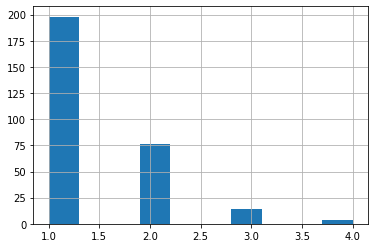

In [51]:
#Столбец числовой, посмотрим на его распределение
students.traveltime.hist()
students.traveltime.describe()


Выбросов нет.

In [52]:
students.traveltime.value_counts(dropna=False)

1.0    198
2.0     76
NaN     20
3.0     14
4.0      4
Name: traveltime, dtype: int64

In [53]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'traveltime')
students.traveltime.value_counts(dropna=False)

1.0    218
2.0     76
3.0     14
4.0      4
Name: traveltime, dtype: int64

count    312.000000
mean       1.371795
std        0.633654
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

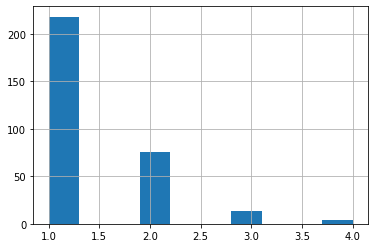

In [54]:
students.traveltime.hist()
students.traveltime.describe()


## studytime

count    309.000000
mean       2.045307
std        0.828403
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

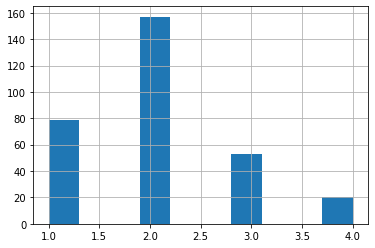

In [55]:
#Столбец числовой, посмотрим на его распределение
students.studytime.hist()
students.studytime.describe()


Выбросов нет.

In [56]:
students.studytime.value_counts(dropna=False)

2.0    157
1.0     79
3.0     53
4.0     20
NaN      3
Name: studytime, dtype: int64

In [57]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'studytime')
students.studytime.value_counts(dropna=False)

2.0    160
1.0     79
3.0     53
4.0     20
Name: studytime, dtype: int64

## failures

count    298.000000
mean       0.332215
std        0.738801
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

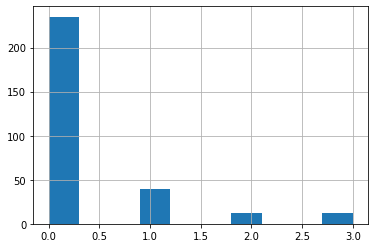

In [58]:
#Столбец числовой, посмотрим на его распределение
students.failures.hist()
students.failures.describe()

In [59]:
students.failures.value_counts(dropna=False)

0.0    235
1.0     39
NaN     14
2.0     12
3.0     12
Name: failures, dtype: int64

In [60]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'failures')
students.failures.value_counts(dropna=False)

0.0    249
1.0     39
2.0     12
3.0     12
Name: failures, dtype: int64

## schoolsup

In [61]:
students.schoolsup.value_counts(dropna=False)

no     263
yes     41
NaN      8
Name: schoolsup, dtype: int64

In [62]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'schoolsup', drop=True)
students.schoolsup.value_counts(dropna=False)

no     263
yes     41
Name: schoolsup, dtype: int64

In [63]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду yes - 1 и no - 0:
to_binary(students, 'schoolsup', 'yes', 'no')
students.schoolsup.value_counts(dropna=False)

0    263
1     41
Name: schoolsup, dtype: int64

## famsup

In [64]:
students.famsup.value_counts(dropna=False)

yes    170
no     107
NaN     27
Name: famsup, dtype: int64

In [65]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'famsup', drop=True)
students.famsup.value_counts(dropna=False)

yes    170
no     107
Name: famsup, dtype: int64

In [66]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду GT3 - 1 и LE3 - 0:
to_binary(students, 'famsup', 'yes', 'no')
students.famsup.value_counts(dropna=False)

1    170
0    107
Name: famsup, dtype: int64

## paid

In [67]:
students.paid.value_counts(dropna=False)

no     136
yes    108
NaN     33
Name: paid, dtype: int64

In [68]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'paid', drop=True)
students.paid.value_counts(dropna=False)

no     136
yes    108
Name: paid, dtype: int64

In [69]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду yes - 1 и no - 0:
to_binary(students, 'paid', 'yes', 'no')
students.paid.value_counts(dropna=False)

0    136
1    108
Name: paid, dtype: int64

## activities

In [70]:
students.activities.value_counts(dropna=False)

yes    118
no     114
NaN     12
Name: activities, dtype: int64

In [71]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'activities', drop=True)
students.activities.value_counts(dropna=False)

yes    118
no     114
Name: activities, dtype: int64

In [72]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду yes - 1 и no - 0:
to_binary(students, 'activities', 'yes', 'no')
students.activities.value_counts(dropna=False)

1    118
0    114
Name: activities, dtype: int64

## nursery

In [73]:
students.nursery.value_counts(dropna=False)

yes    175
no      47
NaN     10
Name: nursery, dtype: int64

In [74]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'nursery', drop=True)
students.nursery.value_counts(dropna=False)

yes    175
no      47
Name: nursery, dtype: int64

In [75]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду yes - 1 и no - 0:
to_binary(students, 'nursery', 'yes', 'no')
students.nursery.value_counts(dropna=False)

1    175
0     47
Name: nursery, dtype: int64

## higher


In [76]:
students.higher.value_counts(dropna=False)

yes    201
NaN     14
no       7
Name: higher, dtype: int64

In [77]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'higher', drop=True)
students.higher.value_counts(dropna=False)

yes    201
no       7
Name: higher, dtype: int64

In [78]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду yes - 1 и no - 0:
to_binary(students, 'higher', 'yes', 'no')
students.higher.value_counts(dropna=False)

1    201
0      7
Name: higher, dtype: int64

## internet

In [79]:
students.internet.value_counts(dropna=False)

yes    158
no      26
NaN     24
Name: internet, dtype: int64

In [80]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'internet', drop=True)
students.internet.value_counts(dropna=False)

yes    158
no      26
Name: internet, dtype: int64

In [81]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду yes - 1 и no - 0:
to_binary(students, 'internet', 'yes', 'no')
students.internet.value_counts(dropna=False)

1    158
0     26
Name: internet, dtype: int64

## romantic

In [82]:
students.romantic.value_counts(dropna=False)

no     109
yes     64
NaN     11
Name: romantic, dtype: int64

In [83]:
# Удалим записи с пустыми значениями
null_non_numeric_processing(students, 'romantic', drop=True)
students.romantic.value_counts(dropna=False)

no     109
yes     64
Name: romantic, dtype: int64

In [84]:
# У параметра только два значеня для дальнейшего анализа приведем к числовому виду yes - 1 и no - 0:
to_binary(students, 'romantic', 'yes', 'no')
students.romantic.value_counts(dropna=False)

0    109
1     64
Name: romantic, dtype: int64

## famrel


count    160.000000
mean       3.925000
std        0.894076
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

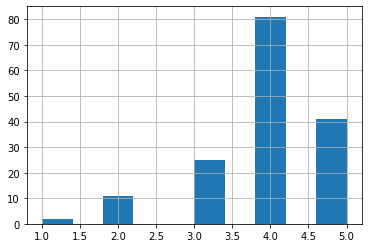

In [85]:
#Столбец числовой, посмотрим на его распределение
students.famrel.hist()
students.famrel.describe()

In [86]:
students.famrel.value_counts(dropna=False)

4.0    81
5.0    41
3.0    25
NaN    13
2.0    11
1.0     2
Name: famrel, dtype: int64

In [87]:
# Заменим пустые значения на медиану, удалим записи с выбросами.
null_numeric_processing(students, 'famrel')
outliers_processing(students, 'famrel', min_value=1, max_value=5, drop=True)
students.famrel.value_counts(dropna=False)


4.0    94
5.0    41
3.0    25
2.0    11
1.0     2
Name: famrel, dtype: int64

count    173.000000
mean       3.930636
std        0.859853
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

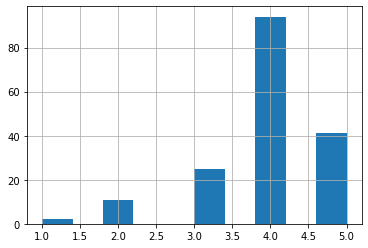

In [88]:
students.famrel.hist()
students.famrel.describe()

## freetime

count    168.000000
mean       3.184524
std        1.006802
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

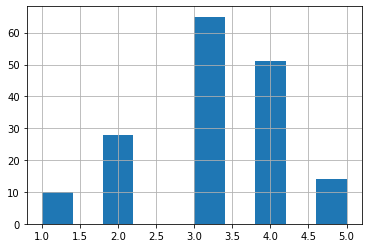

In [89]:
#Столбец числовой, посмотрим на его распределение
students.freetime.hist()
students.freetime.describe()

In [90]:
students.freetime.value_counts(dropna=False)

3.0    65
4.0    51
2.0    28
5.0    14
1.0    10
NaN     5
Name: freetime, dtype: int64

In [91]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'freetime')
students.freetime.value_counts(dropna=False)

3.0    70
4.0    51
2.0    28
5.0    14
1.0    10
Name: freetime, dtype: int64

count    173.000000
mean       3.179191
std        0.992545
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

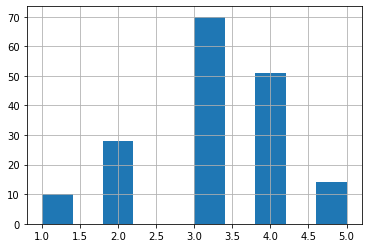

In [92]:
students.freetime.hist()
students.freetime.describe()

## goout

count    170.000000
mean       3.147059
std        1.080553
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

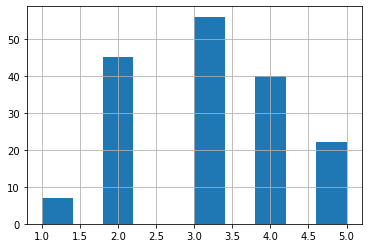

In [93]:
#Столбец числовой, посмотрим на его распределение
students.goout.hist()
students.goout.describe()

In [94]:
students.goout.value_counts(dropna=False)

3.0    56
2.0    45
4.0    40
5.0    22
1.0     7
NaN     3
Name: goout, dtype: int64

In [95]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'goout')
students.goout.value_counts(dropna=False)

3.0    59
2.0    45
4.0    40
5.0    22
1.0     7
Name: goout, dtype: int64

count    173.000000
mean       3.144509
std        1.071261
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

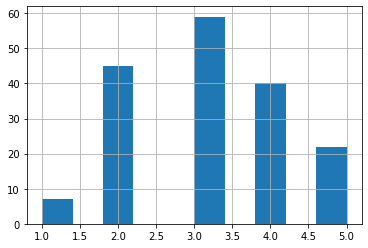

In [96]:
students.goout.hist()
students.goout.describe()

## health

count    167.000000
mean       3.502994
std        1.417933
min        1.000000
25%        2.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

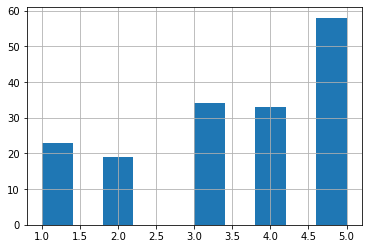

In [97]:
#Столбец числовой, посмотрим на его распределение
students.health.hist()
students.health.describe()

In [98]:
students.health.value_counts(dropna=False)

5.0    58
3.0    34
4.0    33
1.0    23
2.0    19
NaN     6
Name: health, dtype: int64

In [99]:
# Заменим пустые значения на медиану.
null_numeric_processing(students, 'health')
students.health.value_counts(dropna=False)

5.0    58
4.0    39
3.0    34
1.0    23
2.0    19
Name: health, dtype: int64

count    173.000000
mean       3.520231
std        1.395964
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

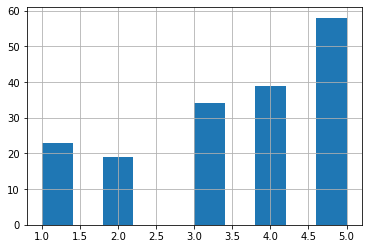

In [100]:
students.health.hist()
students.health.describe()

## absences

count    168.000000
mean       6.857143
std       17.572872
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      212.000000
Name: absences, dtype: float64

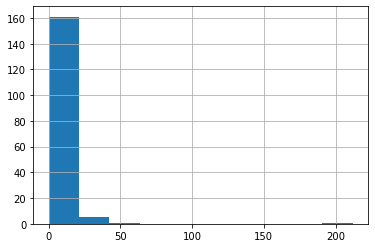

In [101]:
#Столбец числовой, посмотрим на его распределение
students.absences.hist()
students.absences.describe()

In [102]:
students.absences.value_counts(dropna=False)

0.0      50
4.0      24
2.0      21
6.0      14
10.0      8
8.0       7
3.0       5
NaN       5
16.0      4
7.0       4
14.0      4
5.0       4
18.0      3
9.0       3
12.0      2
15.0      2
22.0      2
1.0       2
20.0      2
28.0      1
26.0      1
17.0      1
54.0      1
13.0      1
40.0      1
212.0     1
Name: absences, dtype: int64

In [103]:
# Заменим пустые значения на медиану, удалим записи с выбросами.
null_numeric_processing(students, 'absences')
outliers_processing(students, 'absences', drop=True)
students.absences.value_counts(dropna=False)

0.0     50
4.0     29
2.0     21
6.0     14
10.0     8
8.0      7
3.0      5
16.0     4
5.0      4
14.0     4
7.0      4
18.0     3
9.0      3
12.0     2
15.0     2
1.0      2
20.0     2
13.0     1
17.0     1
Name: absences, dtype: int64

count    166.000000
mean       4.626506
std        4.990198
min        0.000000
25%        0.000000
50%        4.000000
75%        6.000000
max       20.000000
Name: absences, dtype: float64

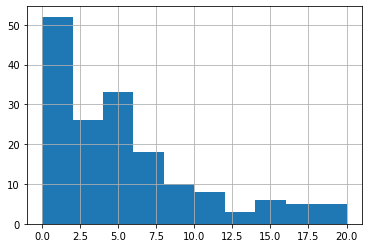

In [104]:
students.absences.hist()
students.absences.describe()

## score

count    164.000000
mean      53.231707
std       23.935906
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

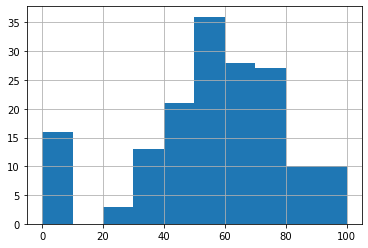

In [105]:
#Столбец числовой, посмотрим на его распределение
students.score.hist()
students.score.describe()

In [106]:
students.score.value_counts(dropna=False)

50.0     19
55.0     17
75.0     16
0.0      16
65.0     15
60.0     13
40.0     13
70.0     11
80.0      8
45.0      8
35.0      7
30.0      6
90.0      5
95.0      4
25.0      3
85.0      2
NaN       2
100.0     1
Name: score, dtype: int64

In [107]:
# Удалим пустые значения.
null_numeric_processing(students, 'score', drop=True)
outliers_processing(students, 'score', drop=True)
students.score.value_counts(dropna=False)

50.0     19
55.0     17
0.0      16
75.0     16
65.0     15
60.0     13
40.0     13
70.0     11
80.0      8
45.0      8
35.0      7
30.0      6
90.0      5
95.0      4
25.0      3
85.0      2
100.0     1
Name: score, dtype: int64

In [108]:
len(students)

164

### Поиск неиформативных признаков

In [109]:
num_rows = len(students.index)
low_information_cols = [] #

for col in students.columns:
    cnts = students[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    #print(top_pct)
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)

higher: 95.73171%
1    157
0      7
Name: higher, dtype: int64


In [110]:
# удалим столбец 'higher', как неинформативный
students = students.drop('higher', 1)

## Корреляционный анализ

Выясним, какие столбцы коррелируют. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов.



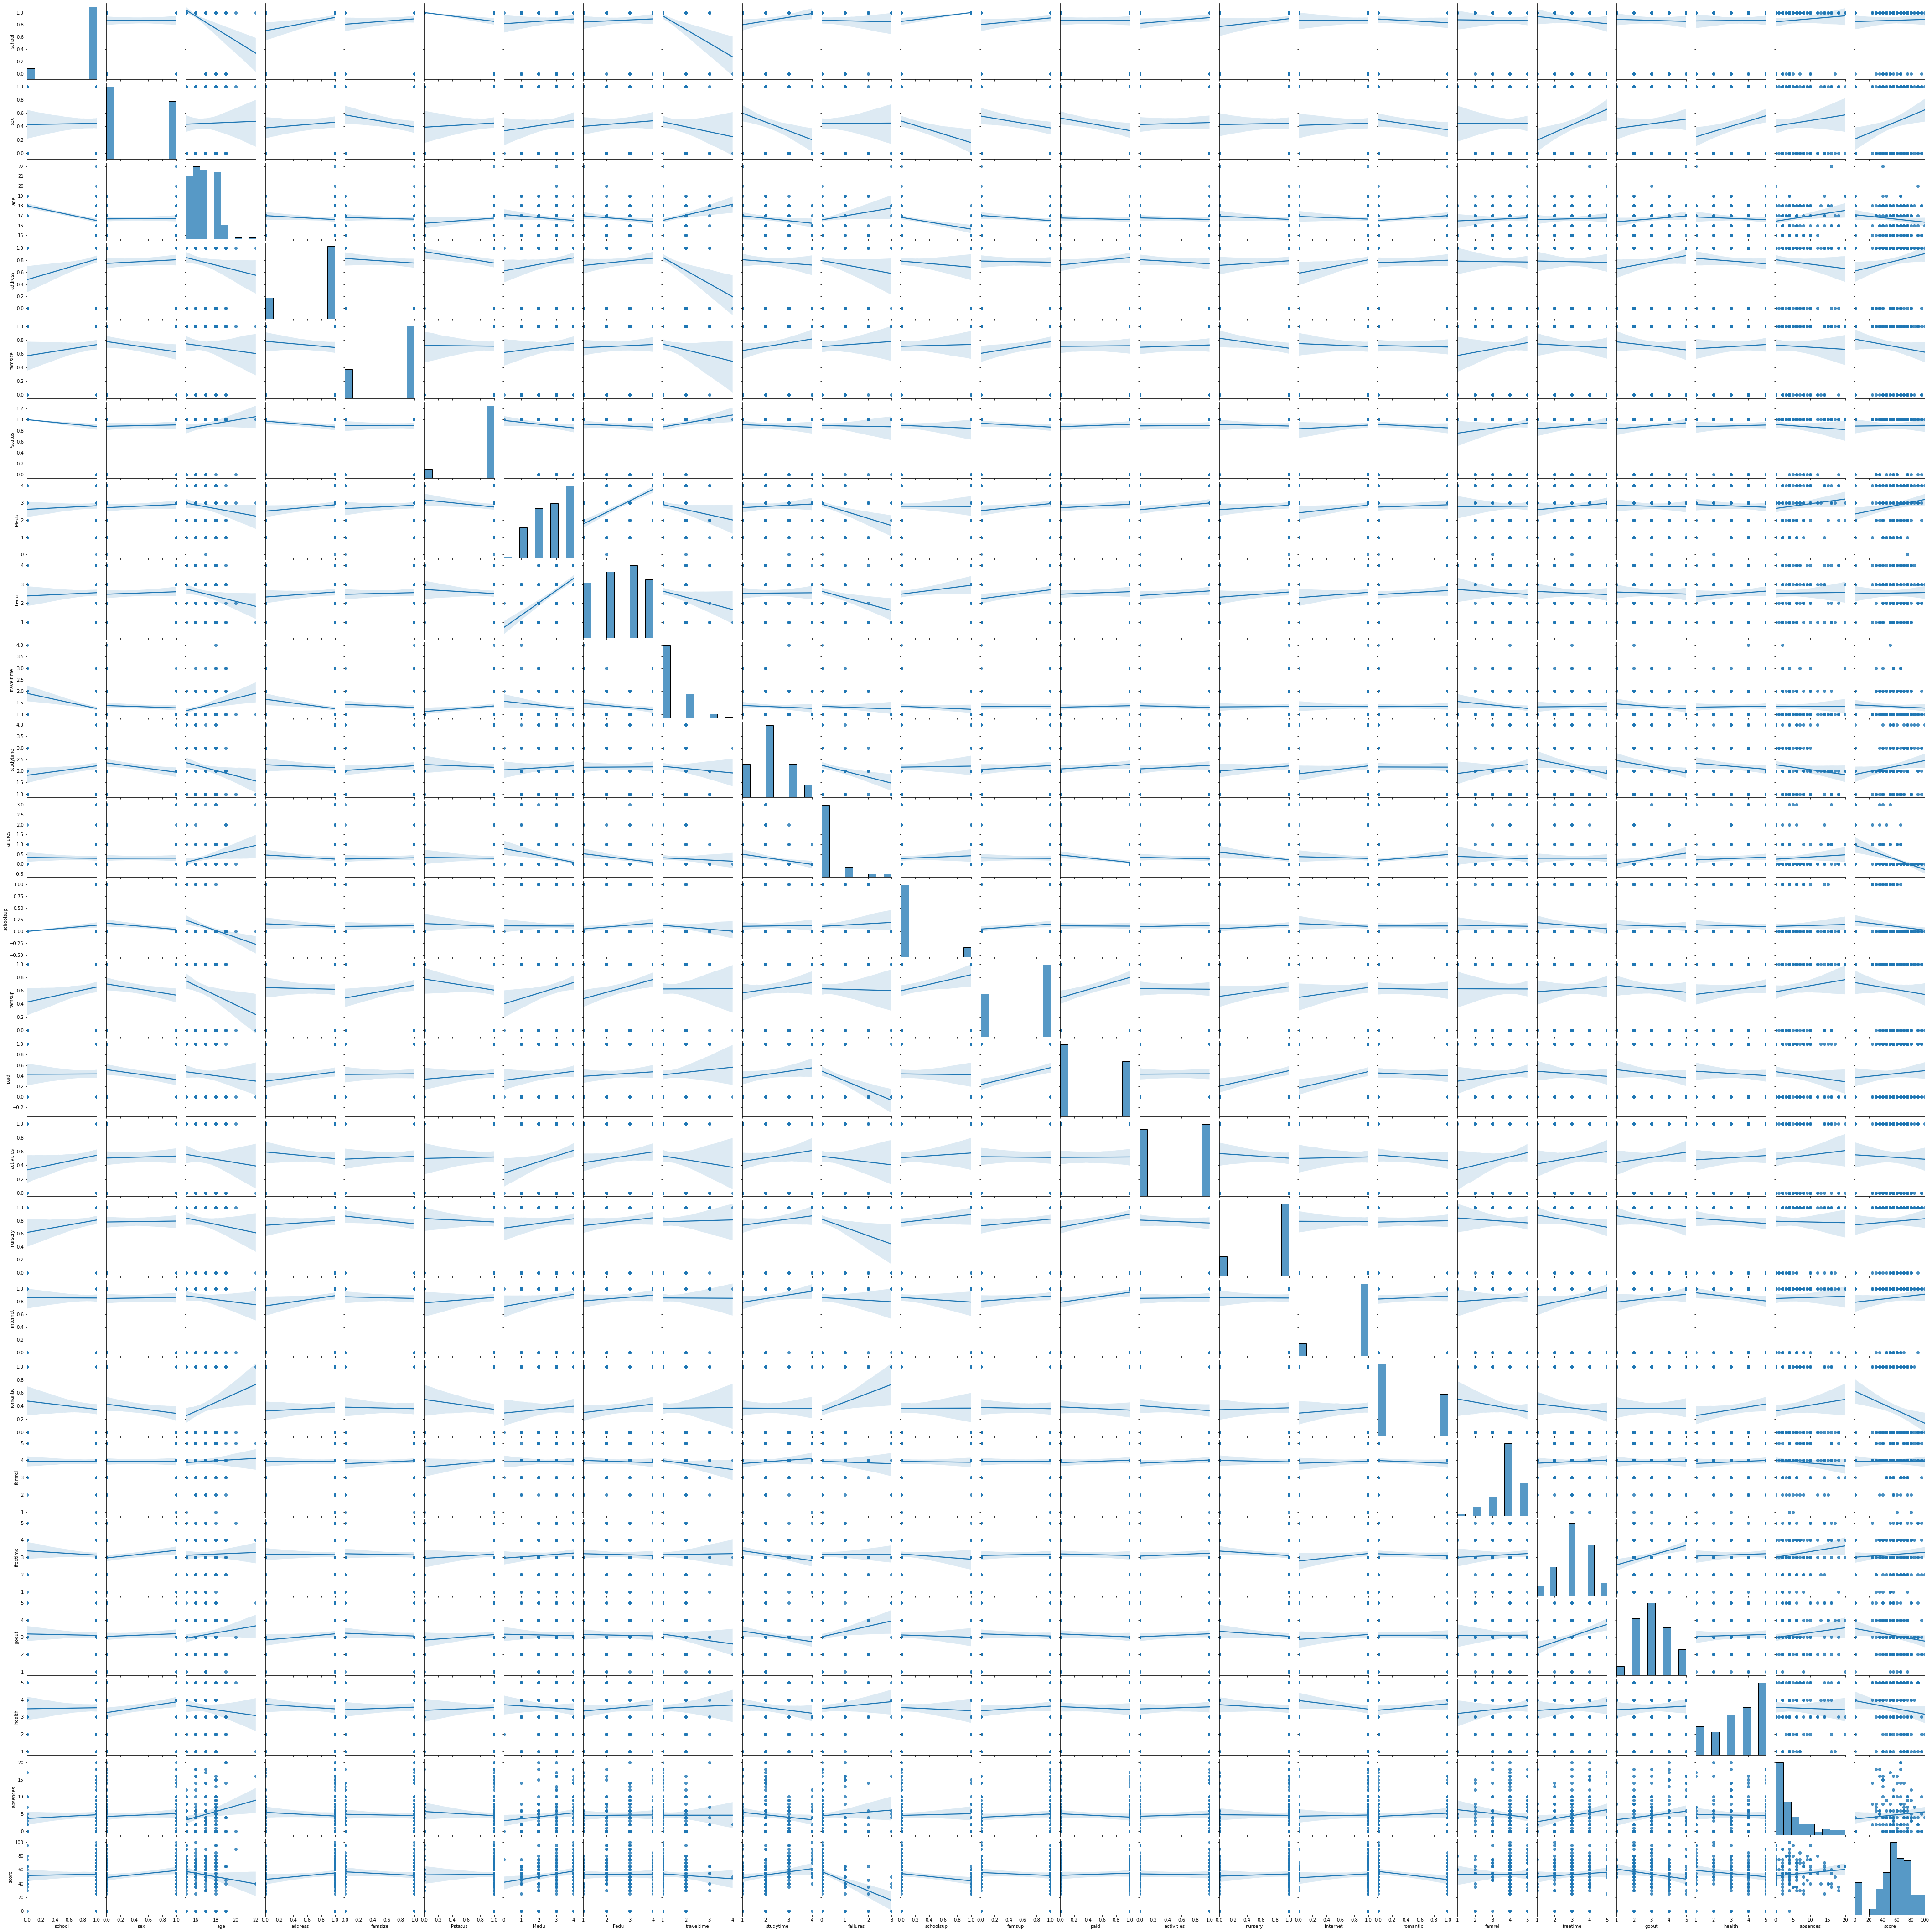

In [111]:
sns.pairplot(students, kind = 'reg')

In [112]:
students.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,internet,romantic,famrel,freetime,goout,health,absences,score
school,1.000000,0.012762,-0.389283,0.273395,0.120334,-0.134555,0.063269,0.053401,-0.383554,0.159691,-0.018685,0.138719,0.158160,0.003369,0.141853,0.156700,-0.003778,-0.087784,-0.008565,-0.085392,-0.026795,0.014876,0.072975,0.025133
sex,0.012762,1.000000,0.016174,0.072489,-0.164957,0.039730,0.086658,0.060305,-0.086134,-0.233034,0.003273,-0.209209,-0.173826,-0.188284,0.028598,0.017347,0.023706,-0.145379,-0.001461,0.227263,0.075216,0.221703,0.084773,0.210334
age,-0.389283,0.016174,1.000000,-0.130063,-0.058682,0.127005,-0.127002,-0.158267,0.244816,-0.170573,0.221606,-0.296606,-0.195215,-0.065995,-0.062098,-0.102451,-0.073034,0.183027,0.051996,0.031131,0.123554,-0.077508,0.211974,-0.139626
address,0.273395,0.072489,-0.130063,1.000000,-0.084001,-0.142853,0.141439,0.103700,-0.299814,-0.061983,-0.122383,-0.078099,-0.023005,0.147750,-0.082424,0.074901,0.189254,0.046538,-0.008073,-0.013653,0.140606,-0.076887,-0.088888,0.164798
famsize,0.120334,-0.164957,-0.058682,-0.084001,1.000000,-0.006839,0.081046,0.036857,-0.106111,0.109282,0.038871,0.018755,0.181866,0.009459,0.036698,-0.132657,-0.033500,-0.022534,0.090591,-0.031425,-0.070189,0.047559,-0.034485,-0.100652
Pstatus,-0.134555,0.039730,0.127005,-0.142853,-0.006839,1.000000,-0.118657,-0.062737,0.133221,-0.043362,-0.017120,-0.055747,-0.108774,0.070577,0.012855,-0.040062,0.075382,-0.097789,0.129813,0.079641,0.092949,0.035546,-0.074409,0.010767
Medu,0.063269,0.086658,-0.127002,0.141439,0.081046,-0.118657,1.000000,0.660317,-0.157168,0.055793,-0.269840,-0.003095,0.182240,0.093675,0.180518,0.095111,0.145329,0.058994,0.005061,0.083274,-0.021921,-0.050032,0.125627,0.185817
Fedu,0.053401,0.060305,-0.158267,0.103700,0.036857,-0.062737,0.660317,1.000000,-0.174390,0.007515,-0.224466,0.140628,0.215849,0.061187,0.112682,0.104946,0.092147,0.096391,-0.053298,-0.037012,-0.027043,0.092819,0.010449,0.014011
traveltime,-0.383554,-0.086134,0.244816,-0.299814,-0.106111,0.133221,-0.157168,-0.174390,1.000000,-0.063858,-0.046901,-0.074755,0.001873,0.056117,-0.063412,0.013573,-0.002927,0.005370,-0.114252,0.012123,-0.101910,0.025427,0.000233,-0.057556
studytime,0.159691,-0.233034,-0.170573,-0.061983,0.109282,-0.043362,0.055793,0.007515,-0.063858,1.000000,-0.212091,0.016619,0.093362,0.111849,0.091339,0.102597,0.141261,-0.003562,0.095992,-0.171084,-0.166391,-0.104880,-0.124902,0.164940


Есть корреляция между двумя показателями Fedu и Medu. Один из них можно исключить в дальнейшем.

In [113]:
students.corr().index

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score'],
      dtype='object')

In [748]:
students.corr().columns


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [135]:
m = 0
for i,j in students.corr().iterrows():
        #print(i)
        k = m
        attent_str = ''
        for x in j[k + 1: ]:
            #print(k)
            #print(x, students.corr().index[k + 1])
            if students.corr().index[k + 1] == 'score':
                attent_str = '!!!ВНИМАНИЕ: '
            if 0.1 <= abs(x) < 0.3: 
                print(f'{attent_str}Слабая корреляция между параметрами {i} и {students.corr().index[k + 1]}: {x}')
            elif 0.3 <= abs(x) < 0.5:
                print(f'{attent_str}Умеренная корреляция между параметрами {i} и {students.corr().index[k + 1]}: {x}')
            elif 0.5 <= abs(x) < 0.7:
                print(f'{attent_str}Заметная корреляция между параметрами {i} и {students.corr().index[k + 1]}: {x}')
            elif 0.7 <= abs(x) < 0.9:
                print(f'{attent_str}Высокая корреляция между параметрами {i} и {students.corr().index[k + 1]}: {x}')
            elif 0.9 <= abs(x) < 1:
                print(f'{attent_str}Весьма высокая корреляция между параметрами {i} и {students.corr().index[k + 1]}: {x}')
            k += 1
        m += 1

Умеренная корреляция между параметрами school и age: -0.38928289208495126
Слабая корреляция между параметрами school и address: 0.2733946772484771
Слабая корреляция между параметрами school и famsize: 0.12033427152143948
Слабая корреляция между параметрами school и Pstatus: -0.13455549965997013
Умеренная корреляция между параметрами school и traveltime: -0.38355377105646205
Слабая корреляция между параметрами school и studytime: 0.15969122325271087
Слабая корреляция между параметрами school и schoolsup: 0.13871851404689226
Слабая корреляция между параметрами school и famsup: 0.15815959386920483
Слабая корреляция между параметрами school и activities: 0.14185307602636005
Слабая корреляция между параметрами school и nursery: 0.15670009859740272
Слабая корреляция между параметрами sex и famsize: -0.1649571605001269
Слабая корреляция между параметрами sex и studytime: -0.23303436567258082
Слабая корреляция между параметрами sex и schoolsup: -0.2092088766363868
Слабая корреляция между парам

## Анализ номинативных переменных

Посмотрим, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: Mjob, Fjob, reason, guardian.



In [136]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

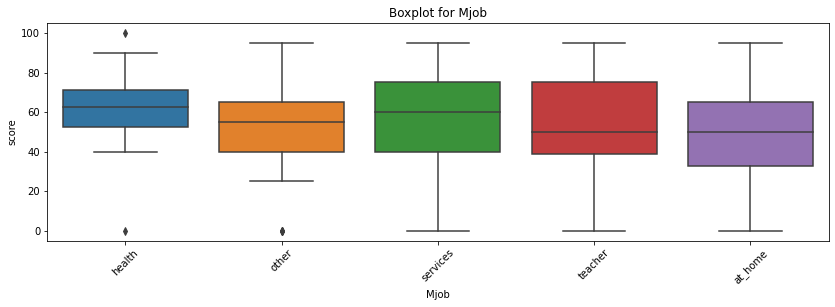

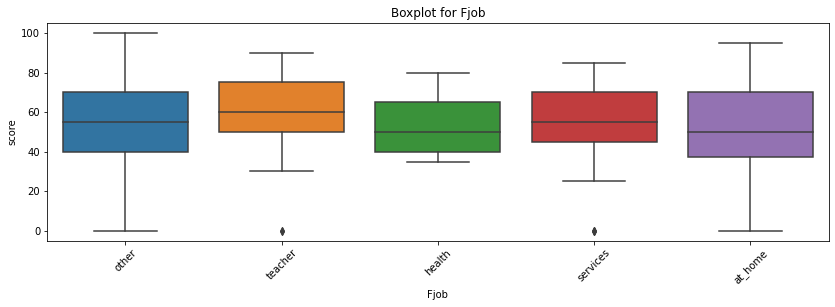

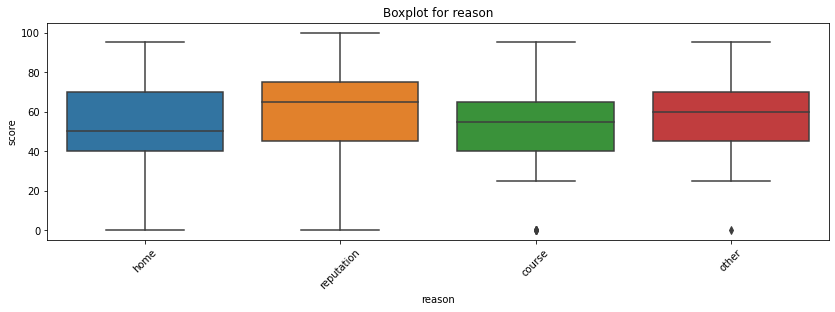

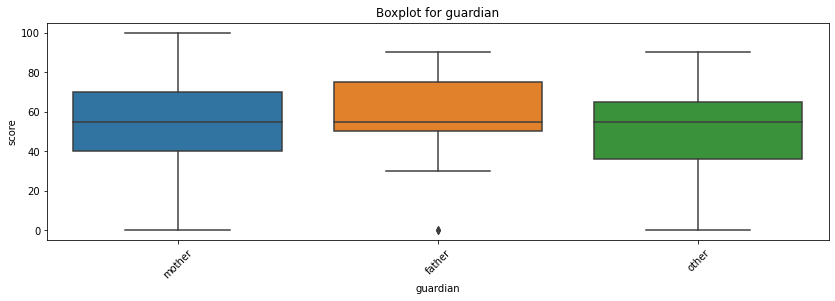

In [137]:
for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме guardian, могут влиять на баллы по экзамену. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по экзамену по различным параметрам неразличимы:

In [146]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:]
    #print(cols)
    combinations_all = list(combinations(cols, 2))
    #print(combinations_all)
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [147]:
for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
    get_stat_dif(col)

Как видим параметры неразличимы.

In [149]:
students.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 391
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      164 non-null    int64  
 1   sex         164 non-null    int64  
 2   age         164 non-null    int64  
 3   address     164 non-null    int64  
 4   famsize     164 non-null    int64  
 5   Pstatus     164 non-null    int64  
 6   Medu        164 non-null    float64
 7   Fedu        164 non-null    float64
 8   Mjob        164 non-null    object 
 9   Fjob        164 non-null    object 
 10  reason      164 non-null    object 
 11  guardian    164 non-null    object 
 12  traveltime  164 non-null    float64
 13  studytime   164 non-null    float64
 14  failures    164 non-null    float64
 15  schoolsup   164 non-null    int64  
 16  famsup      164 non-null    int64  
 17  paid        164 non-null    int64  
 18  activities  164 non-null    int64  
 19  nursery     164 non-null    i

# Выводы

В результате EDA для анализа влияния условий жизни учащихся на их успеваемость по математике были получены следующие выводы:

* В данных есть пустые значения, только столбец Pstatus был c масимальным процентов пропусков 11%.
* Выбросы найдены только в столбцах с образование отца (Fedu) и с количеством пропущенных занятий(absences), что позволяет сделать вывод о том, что данные достаточно чистые.
* Наблюдаются следюущие корреляции с успеваемостью по математике. Слабая положительная корреляция параметров: sex, age, address, famsize, Medu, studytime. Слабая отрицательная корреляция параметров: schoolsup, romantic, goout, health. Заметна умеренная отрицательная корреляция с параметром failures.
* Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это **sex**, **age**, **address**, **famsize**, **Medu**, **studytime** и **failures**.